# Std Deviation of $\phi_{i-1} (t)$ for data collected once ever 61s as a function of sampling frequency $f_s$

This is a jupyter notebook to see if the std-dev can be plotted as a time series.

In [1]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   ├ this notebook(.ipynb)
#   └ traces
#     └ processedLogs-20220224-1557.txt

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path
# Add the FYPLibrary folder in the same level as this folder.
parent_dir = os.path.dirname(os.path.abspath(''))
if os.path.join(parent_dir, 'FYPLibrary') not in sys.path:
    sys.path.append(os.path.join(parent_dir, 'FYPLibrary'))
del parent_dir

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.units as munits


In [2]:
def get_files():
    # uses tkinter to get the paths. returns all files as selected by UI
    # tkinter will not allow for extracting files from multiple folders
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()
    fs = filedialog.askopenfilenames(initialdir= os.path.dirname(os.path.abspath('')), 
        title="Select files")
    return fs

def get_folder():
    # uses tkinter to get a folder
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()
    my_dir = filedialog.askdirectory(initialdir= os.path.dirname(os.path.abspath('')), 
        title="Select directory")
    return my_dir

We pull put the processedLogs txt file first.

In [3]:
# Step 1: Change the name to which the folder you wish to read from
# Yield all files in batch folder
file = os.path.join(os.path.abspath(''), "traces", "processedLogs-20220224-1557.txt")

In [4]:
data_table = pd.read_csv(file, sep= '\t', header= None, names = ('id', 'mean_v', 'std_dev', 'max_v', 'min_v'))

In [5]:
data_table

,id,mean_v,std_dev,max_v,min_v
0,0,-4.130254,2.580797,4.180119,-11.239012
1,1,-2.139741,2.677463,5.541224,-10.449571
2,2,1.184191,3.287589,9.709695,-7.550838
3,3,-0.006861,4.399132,11.090039,-13.581981
4,4,-1.353977,2.147923,6.724345,-8.708075
...,...,...,...,...,...
1416,1416,0.679594,1.770981,6.860932,-6.301727
1417,1417,3.059214,2.964348,12.280196,-4.162862
1418,1418,9.353444,5.508354,46.697426,-31.897588
1419,1419,6.576099,1.753970,13.519073,0.173700


In [6]:
starttime = np.datetime64('2022-02-24 15:57')
my_time_delta = data_table['id'].values * 61
time_axis = starttime + pd.to_timedelta(my_time_delta, 'S') 
y_vals = data_table['std_dev'].values

Now trying to plot std_dev against time

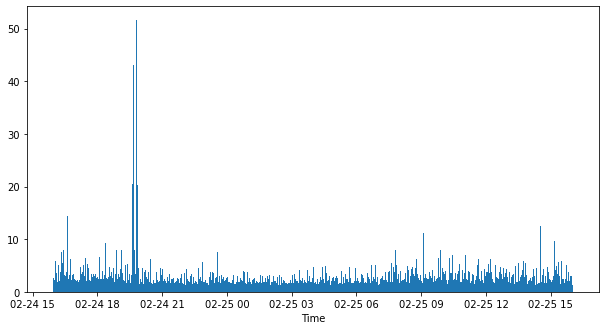

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)
# ax.plot(time_axis, y_vals, linewidth= 0.8)
ax.bar(time_axis, y_vals, width= 0.0008)
ax.set_xlabel('Time', usetex= False)
fig.set_size_inches(11.75-1.5, 1*(8.25-2 - 1))

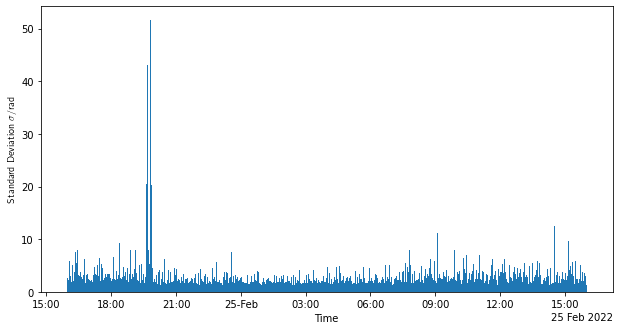

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ['%y',  # ticks are mostly years
                        '%b',       # ticks are mostly months
                        '%d',       # ticks are mostly days
                        '%H:%M',    # hrs
                        '%H:%M',    # min
                        '%S.%f', ]  # secs
# these are mostly just the level above...
formatter.zero_formats = [''] + formatter.formats[:-1]
# ...except for ticks that are mostly hours, then it is nice to have
# month-day:
formatter.zero_formats[3] = '%d-%b'

formatter.offset_formats = ['',
                            '%Y',
                            '%b %Y',
                            '%d %b %Y',
                            '%d %b %Y',
                            '%d %b %Y %H:%M', ]
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(time_axis, y_vals, width= 0.0008)
ax.set_ylabel('Standard Deviation $\sigma$/rad', usetex= True)
ax.set_xlabel('Time', usetex= False)
fig.set_size_inches(11.75-1.5, 1*(8.25-2 - 1))